In [1]:
from mmdet.apis import inference_detector, init_detector
import random 
import os
import torch
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.ops import nms

In [2]:
config = '../mmdetection/configs/rtmdet/rtmdet_p6_l_mod.py'
checkpoint = '../mmdetection/train/rtmdet_p6/epoch_40.pth'
model = init_detector(
    config, checkpoint, device='cuda')

Loads checkpoint by local backend from path: ../mmdetection/train/rtmdet_p6/epoch_40.pth


c:\users\elsto\downloads\coding\mmdetection\mmdet\apis\inference.py:108: UserWarning: palette does not exist, random is used by default. You can also set the palette to customize.
  warnings.warn(


In [3]:
randomimg = random.choice(os.listdir('./dataset/val'))
randomimg

'1350e26eb1fe4fd07d31fc16a23db2dd.jpg'

In [13]:
def detect(
        model:init_detector, 
        img:str, 
        conf_thres:float = 0.28,
        nms_thres: float = 0.5):
    result = inference_detector(model, img).pred_instances
    bboxes = result.bboxes
    labels = result.labels
    scores = result.scores
    idx = scores > conf_thres
    bboxes = bboxes[idx]
    labels = labels[idx]
    scores = scores[idx]
    idx = nms(bboxes, scores, nms_thres)
    bboxes = bboxes.tolist()
    labels = labels.tolist()
    scores = scores.tolist()
    bboxes = [bboxes[i] for i in idx]
    labels = [labels[i] for i in idx]
    scores = [scores[i] for i in idx]
    return bboxes, labels, scores

In [14]:
def show(model, img):
    bboxes, labels, scores = detect(model, img)
    img = cv2.imread(img)
    for bbox, label, score in zip(bboxes, labels, scores):
        x1, y1, x2, y2 = bbox
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(img, str(label), (int(x1), int(y1)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    plt.imshow(img)

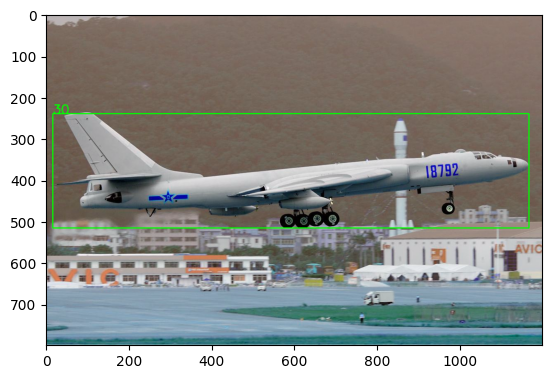

In [33]:
randomimg = random.choice(os.listdir('./dataset/val'))
img = f'./dataset/val/{randomimg}'
show(model, img)
